In [4]:
import pandas as pd

In [5]:
data = pd.read_csv('star_classification.csv')

In [7]:
data.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237660e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543780e+18,GALAXY,0.634794,5812,56354,171
1,1.237660e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176010e+19,GALAXY,0.779136,10445,58158,427
2,1.237660e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237660e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030110e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891860e+18,GALAXY,0.116123,6121,56187,842


In [15]:
data.shape

(100000, 18)

In [8]:
dfstar.isna().sum()

obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64

## Exploratory Data Analysis

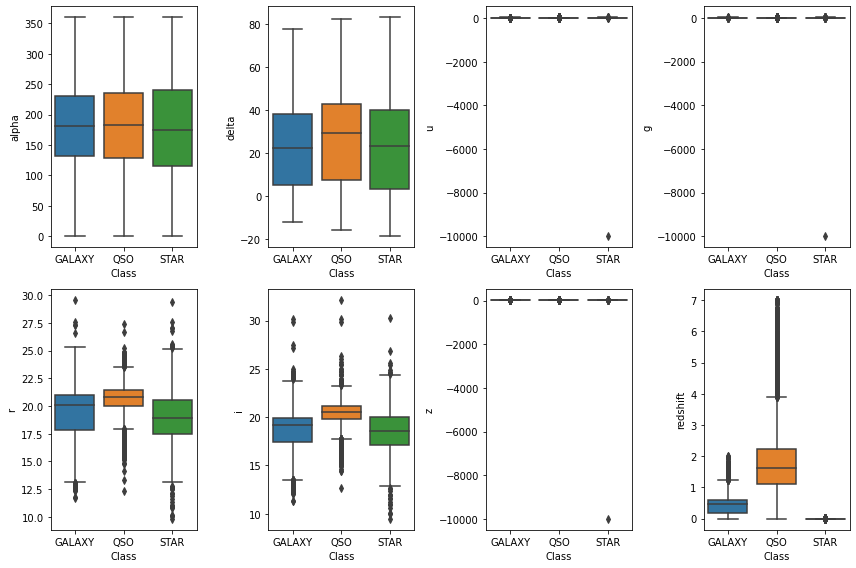

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
selected_features = ["alpha", "delta", "u", "g", "r", "i", "z", "redshift"]

# Boxplot for each feature with respect to the target variable "class"
plt.figure(figsize=(12, 8))
for i, feature in enumerate(selected_features):
    plt.subplot(2, 4, i + 1)
    sns.boxplot(x="class", y=feature, data=data)
    plt.xlabel("Class")
    plt.ylabel(feature)
plt.tight_layout()
plt.show()

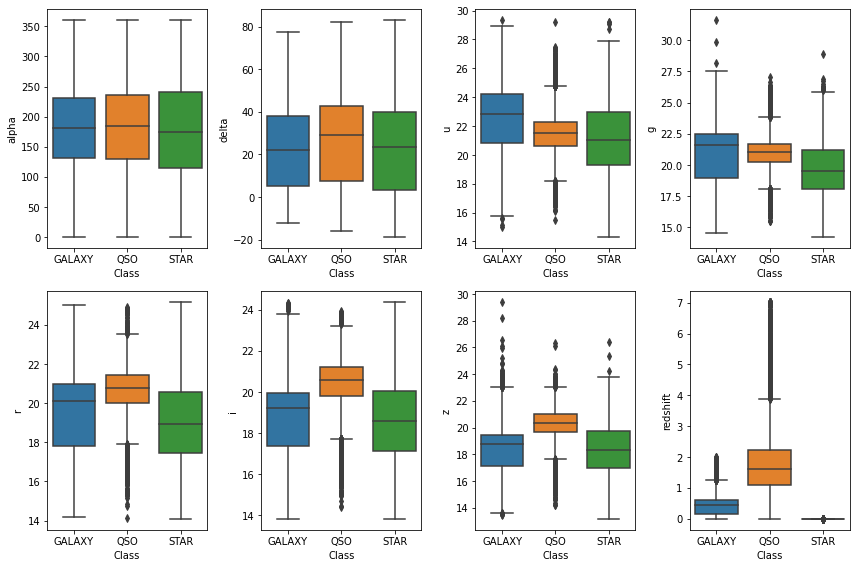

In [13]:
# Calculate z-scores for the selected features
z_scores = pd.DataFrame()
for feature in ["u", "g", "z", "i", "r"]:
    z_scores[feature] = (data[feature] - data[feature].mean()) / data[feature].std()

# Identify outliers using z-scores
outlier_threshold = 3  # Adjust the threshold as needed
outliers = (z_scores > outlier_threshold) | (z_scores < -outlier_threshold)

# Remove outliers from the dataset
data_no_outliers = data[~outliers.any(axis=1)]

# Create boxplots without outliers
plt.figure(figsize=(12, 8))
for i, feature in enumerate(selected_features):
    plt.subplot(2, 4, i + 1)
    sns.boxplot(x="class", y=feature, data=data_no_outliers)
    plt.xlabel("Class")
    plt.ylabel(feature)
plt.tight_layout()
plt.show()

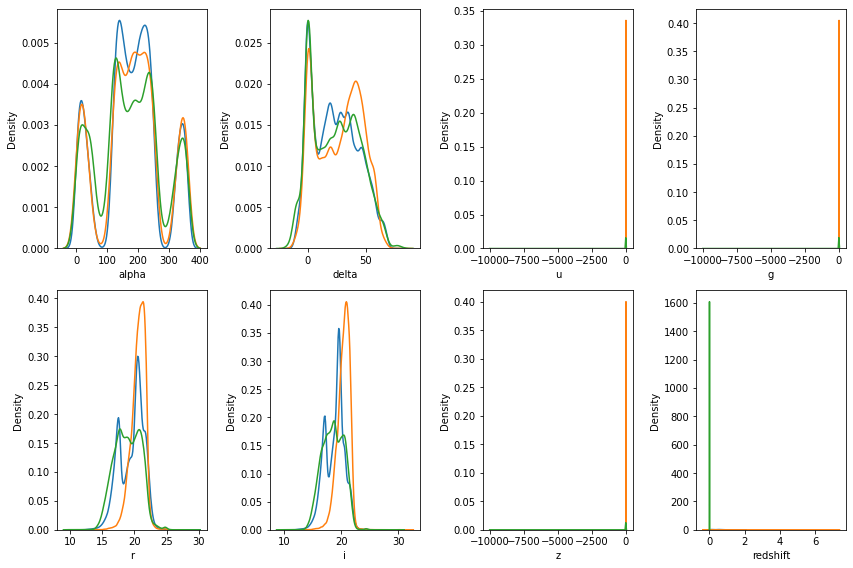

In [14]:
plt.figure(figsize=(12, 8))
for i, feature in enumerate(selected_features):
    plt.subplot(2, 4, i + 1)
    for c in data["class"].unique():
        sns.kdeplot(data[data["class"] == c][feature], label=c)
    plt.xlabel(feature)
    plt.ylabel("Density")
plt.tight_layout()
plt.show()

#The density plot is a visual representation of the Probability Density Function (PDF) for each feature based on the target 
# class. It shows the distribution of the data and provides insights into how the feature values are distributed for each
# class.

# The density plots for each feature show that the distributions of feature values for different classes 
# (e.g., "STAR," "GALAXY," and potentially "QUASAR") overlap with each other. This indicates that there is no clear 
# and distinct separation between the classes based on individual feature values. 

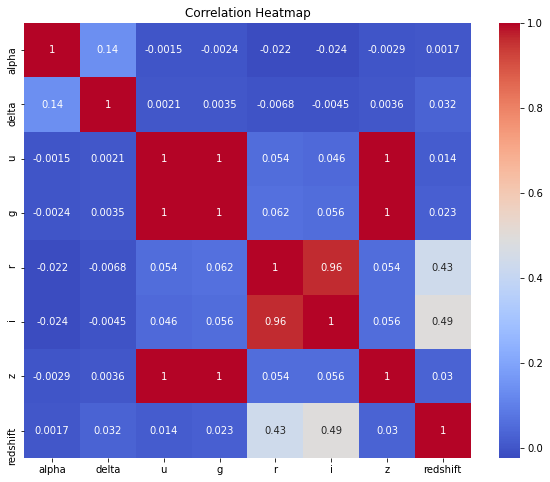

In [12]:
plt.figure(figsize=(10, 8))
sns.heatmap(data[selected_features].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Some features such g and u, u and z, g and z, have a perfect positive correlation.
# next it will be important to consider feature selection or engineering to avoid multicollinearity (high correlation 
# between predictor features), which can impact the model's interpretability and performance. 

# Data split and preprocessing

In [119]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Select the important columns for the feature matrix X
cols = ['alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'redshift']
X = data_no_outliers[cols]

# Extract the target variable 'class' into the array y
y = data_no_outliers['class'].values

# Print the columns of the feature matrix X
print("Selected Features:\n", X.columns)

Selected Features:
 Index(['alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'redshift'], dtype='object')


In [120]:
# Split data into Training and Test sets (85% Train, 15% Test)
(X_train, X_test, y_train, y_test) = train_test_split(X, y, stratify=y, test_size=0.15, random_state=0)

# Further split Training set into Training and Cross-validation sets (70% Train, 15% Cross-validation)
(X_train, X_cv, y_train, y_cv) = train_test_split(X_train, y_train, stratify=y_train, test_size=0.17647, random_state=0)

# Print the shapes of the resulting datasets
print("The shape of X_train dataset: {}".format(X_train.shape))
print("The shape of X_cv dataset: {}".format(X_cv.shape))
print("The shape of X_test dataset: {}".format(X_test.shape))

print("The shape of y_train dataset: {}".format(y_train.shape))
print("The shape of y_cv dataset: {}".format(y_cv.shape))
print("The shape of y_test dataset: {}".format(y_test.shape))

The shape of X_train dataset: (69799, 8)
The shape of X_cv dataset: (14958, 8)
The shape of X_test dataset: (14958, 8)
The shape of y_train dataset: (69799,)
The shape of y_cv dataset: (14958,)
The shape of y_test dataset: (14958,)


In [121]:
# Create a MinMaxScaler object
scaling = MinMaxScaler()

# Scale the feature matrices X_train, X_cv, and X_test using Min-Max scaling

# Fit the MinMaxScaler on the Training set (X_train) to compute the minimum and maximum values for scaling
X_train = scaling.fit_transform(X=X_train)

# Transform (scale) the Cross-validation set (X_cv) and Test set (X_test) using the same scaling parameters obtained from the Training set
X_cv = scaling.transform(X=X_cv)
X_test = scaling.transform(X=X_test)

# The result is that all the features in the Training, Cross-validation, and Test sets are scaled within the same range, 
# facilitating model training and evaluation on the standardized data.

# Feature Engineering

In [122]:
# Function to create Magnitude Differences
def create_magnitude_differences(data):
    """
    Create Magnitude Differences by computing the differences between magnitudes in different bands.
    Args:
        data (pd.DataFrame): Input DataFrame containing 'u', 'g', 'r', 'i', 'z' magnitudes.

    Returns:
        pd.DataFrame: DataFrame with additional columns for Magnitude Differences.
    """
    data['u_g'] = data['u'] - data['g']
    data['g_r'] = data['g'] - data['r']
    data['r_i'] = data['r'] - data['i']
    data['i_z'] = data['i'] - data['z']
    return data

In [123]:
# Function to create Magnitude-Spectral Index Interactions
def create_magnitude_spectral_interactions(data):
    """
    Create Magnitude-Spectral Index Interactions by interacting magnitudes with the spectral index (redshift).
    Args:
        data (pd.DataFrame): Input DataFrame containing 'u', 'g', 'r', 'i', 'z', and 'redshift' columns.

    Returns:
        pd.DataFrame: DataFrame with additional columns for Magnitude-Spectral Index Interactions.
    """
    data['u_redshift'] = data['u'] * data['redshift']
    data['g_redshift'] = data['g'] * data['redshift']
    data['r_redshift'] = data['r'] * data['redshift']
    data['i_redshift'] = data['i'] * data['redshift']
    data['z_redshift'] = data['z'] * data['redshift']
    return data

In [124]:
# Convert X_train, X_cv, and X_test back to pandas DataFrames
X_train = pd.DataFrame(X_train, columns=cols)
X_cv = pd.DataFrame(X_cv, columns=cols)
X_test = pd.DataFrame(X_test, columns=cols)

# Apply the feature engineering functions to X_train, X_cv, and X_test
X_train = create_magnitude_differences(X_train)
X_cv = create_magnitude_differences(X_cv)
X_test = create_magnitude_differences(X_test)

X_train = create_magnitude_spectral_interactions(X_train)
X_cv = create_magnitude_spectral_interactions(X_cv)
X_test = create_magnitude_spectral_interactions(X_test)

# Print the shape of X_train, X_cv, and X_test after feature engineering
print("The shape of X_train after feature engineering: {}".format(X_train.shape))
print("The shape of X_cv after feature engineering: {}".format(X_cv.shape))
print("The shape of X_test after feature engineering: {}".format(X_test.shape))

The shape of X_train after feature engineering: (69799, 17)
The shape of X_cv after feature engineering: (14958, 17)
The shape of X_test after feature engineering: (14958, 17)


## Model Building

In [125]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load preprocessed data and split into train, cross-validation, and test sets
# X_train, X_cv, X_test: Features
# y_train, y_cv, y_test: Target labels

In [128]:
from sklearn.preprocessing import LabelBinarizer

# Initialize label binarizer
label_binarizer = LabelBinarizer()

# Fit label binarizer on training labels and transform all subsets
y_train_encoded = label_binarizer.fit_transform(y_train)
y_cv_encoded = label_binarizer.transform(y_cv)
y_test_encoded = label_binarizer.transform(y_test)

In [131]:
y_test_encoded

array([[1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       ...,
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0]])

In [133]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Step 2: Initialize and Train a Random Forest Classifier

# Initialize the Random Forest Classifier with 100 decision trees
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=0)

# Train the Random Forest model on the training data
rf_classifier.fit(X_train, y_train_encoded)

# Step 3: Make Predictions on Cross-Validation Data

# Make predictions on the cross-validation data
y_cv_pred_encoded = rf_classifier.predict(X_cv)

# Step 4: Calculate Accuracy and Classification Report

# Calculate accuracy on cross-validation data
cv_accuracy = accuracy_score(y_cv_encoded, y_cv_pred_encoded)

# Generate and print the classification report as a string
class_report_str = classification_report(y_cv_encoded, y_cv_pred_encoded, target_names=label_binarizer.classes_.astype(str))
print("Accuracy on Cross-Validation Data:", cv_accuracy)
print("Classification Report:\n", class_report_str)

Accuracy on Cross-Validation Data: 0.9775371038908945
Classification Report:
               precision    recall  f1-score   support

      GALAXY       0.98      0.98      0.98      8888
         QSO       0.96      0.93      0.95      2841
        STAR       0.99      1.00      0.99      3229

   micro avg       0.98      0.98      0.98     14958
   macro avg       0.98      0.97      0.97     14958
weighted avg       0.98      0.98      0.98     14958
 samples avg       0.98      0.98      0.98     14958



C:\Users\arnav\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
